# SMS Spam Classifier

## Steps:
- Data Cleaning
- Exploratory Data Analysis (EDA)
- Text Preprocessing
- Model Building
- Evaluation

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\ASUS\Desktop\ESC\Data\spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [12]:
df.head()

,label,message,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [13]:
# Data Cleaning
print("Dataset Information:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())
print("\nClass Distribution:")
print(df['label'].value_counts())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   label             5572 non-null   int64 
 1   message           5572 non-null   object
 2   transformed_text  5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB

Missing Values:
label               0
message             0
transformed_text    0
dtype: int64

Class Distribution:
label
0    4825
1     747
Name: count, dtype: int64


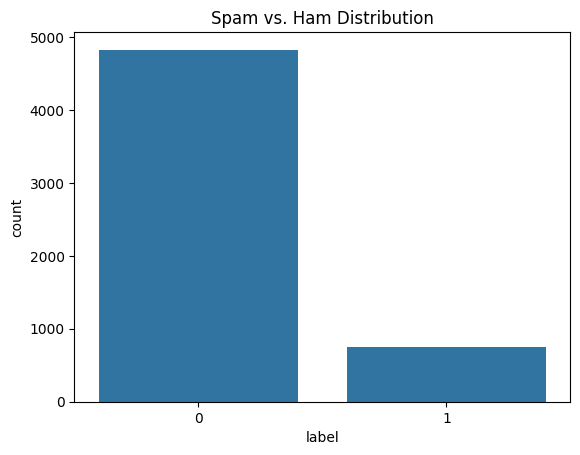

In [14]:
# Exploratory Data Analysis (EDA)
sns.countplot(x=df['label'])
plt.title("Spam vs. Ham Distribution")
plt.show()

In [5]:
# Text Preprocessing
def transform_text(text):
    lemmatizer = WordNetLemmatizer()
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]
    text = [lemmatizer.lemmatize(word) for word in text]
    return " ".join(text)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
df['transformed_text'] = df['message'].apply(transform_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# Vectorization
tfidf = TfidfVectorizer(max_features=5000)
x = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['label'].values

In [8]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
# Model Building
models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True)
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

Naive Bayes Accuracy: 0.9713
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Random Forest Accuracy: 0.9749
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115

SVM Accuracy: 0.9767
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95    

Confusion Matrix:


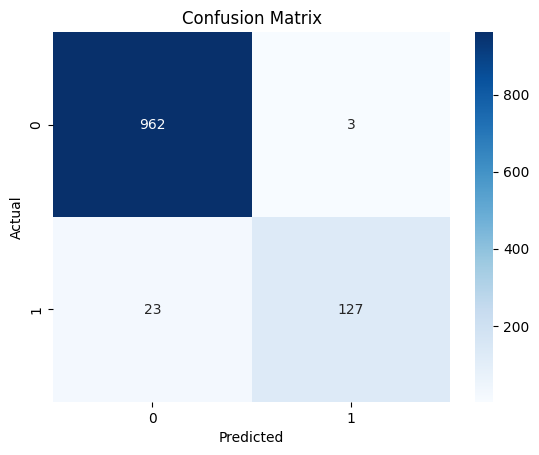

In [10]:
# Model Evaluation
print("Confusion Matrix:")
cm = confusion_matrix(y_test, best_model.predict(x_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Save Best Model and Vectorizer
pickle.dump(best_model, open("model.pkl", 'wb'))
pickle.dump(tfidf, open("vectorizer.pkl", 'wb'))

print("Best Model Saved Successfully!")

Best Model Saved Successfully!
